In [1]:
#sinple CNN for healthy rice classification

import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#batch specification
batch_size = 40
img_height = 200
img_width = 200

#loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'path/rice_plant_img',
	validation_split=0.1,
	subset = 'training',
	seed=42,
	image_size=(img_height,img_width),
	batch_size=batch_size
	)

#loading testing data 
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'path/rice_plant_img',
	validation_split =0.1,
	subset = 'validation', 
	seed=42,
	image_size=(img_height,img_width),
	batch_size=batch_size
	)

class_names = training_ds.class_names

Found 1007 files belonging to 2 classes.
Using 907 files for training.
Found 1007 files belonging to 2 classes.
Using 100 files for validation.


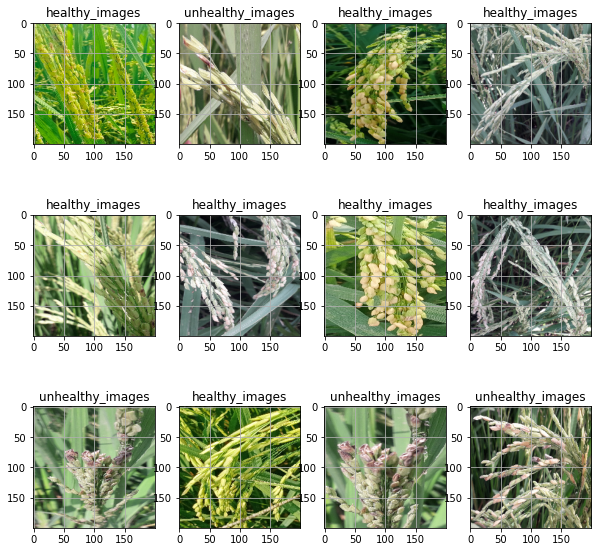

In [2]:
plt.figure(figsize=(10,10))
for images,labels in training_ds.take(1):
	for i in range(12):
		ax = plt.subplot(3,4,i+1)
		plt.imshow(images[i].numpy().astype('uint8'))
		plt.title(class_names[labels[i]])
		plt.grid(True)

Text(0.5, 1.0, 'healthy vs Unhealthy samples in data set')

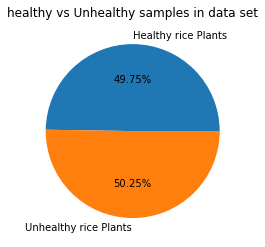

In [3]:
## healthy vs unhealthy samples in data set
healthy = os.listdir('path/rice_plant_img/healthy_images')
unhealthy = os.listdir('path/rice_plant_img/unhealthy_images')
plt.pie ([len(healthy), len(unhealthy)], labels = ['Healthy rice Plants', 
                                                                      'Unhealthy rice Plants'],autopct='%1.2f%%')
plt.title('healthy vs Unhealthy samples in data set')

In [4]:
## defining data augumentation layer
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  
  
])

In [5]:
#define CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(1, activation= 'sigmoid')
])


MyCnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
#rescheduler

def scheduler(epoch,lr):
	if epoch<5:
		return lr
	else:
		return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [7]:
#training model
retVal = MyCnn.fit(training_ds,validation_data=testing_ds,callbacks=[callback],epochs=20)

Epoch 1/20
23/23 [==============================] - 51s 2s/step - loss: 0.9371 - accuracy: 0.5061 - val_loss: 0.6860 - val_accuracy: 0.5800
Epoch 2/20
23/23 [==============================] - 48s 2s/step - loss: 0.6684 - accuracy: 0.5899 - val_loss: 0.8341 - val_accuracy: 0.4800
Epoch 3/20
23/23 [==============================] - 47s 2s/step - loss: 0.6745 - accuracy: 0.5832 - val_loss: 0.6308 - val_accuracy: 0.6100
Epoch 4/20
23/23 [==============================] - 47s 2s/step - loss: 0.6238 - accuracy: 0.6472 - val_loss: 0.6875 - val_accuracy: 0.5700
Epoch 5/20
23/23 [==============================] - 47s 2s/step - loss: 0.5692 - accuracy: 0.6847 - val_loss: 0.6698 - val_accuracy: 0.6100
Epoch 6/20
23/23 [==============================] - 56s 2s/step - loss: 0.5543 - accuracy: 0.7067 - val_loss: 0.6076 - val_accuracy: 0.6500
Epoch 7/20
23/23 [==============================] - 48s 2s/step - loss: 0.4333 - accuracy: 0.7960 - val_loss: 0.6029 - val_accuracy: 0.6700
Epoch 8/20
23/23 [==

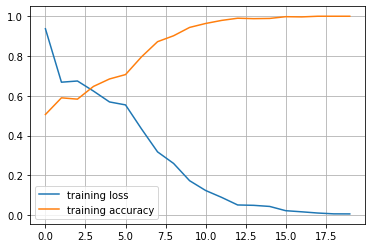

In [8]:
plt.plot(retVal.history['loss'],label='training loss')
plt.plot(retVal.history['accuracy'],label='training accuracy')
plt.legend()
plt.grid(True)

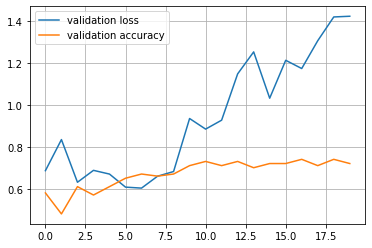

In [9]:
plt.plot(retVal.history['val_loss'],label='validation loss')
plt.plot(retVal.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.grid(True)

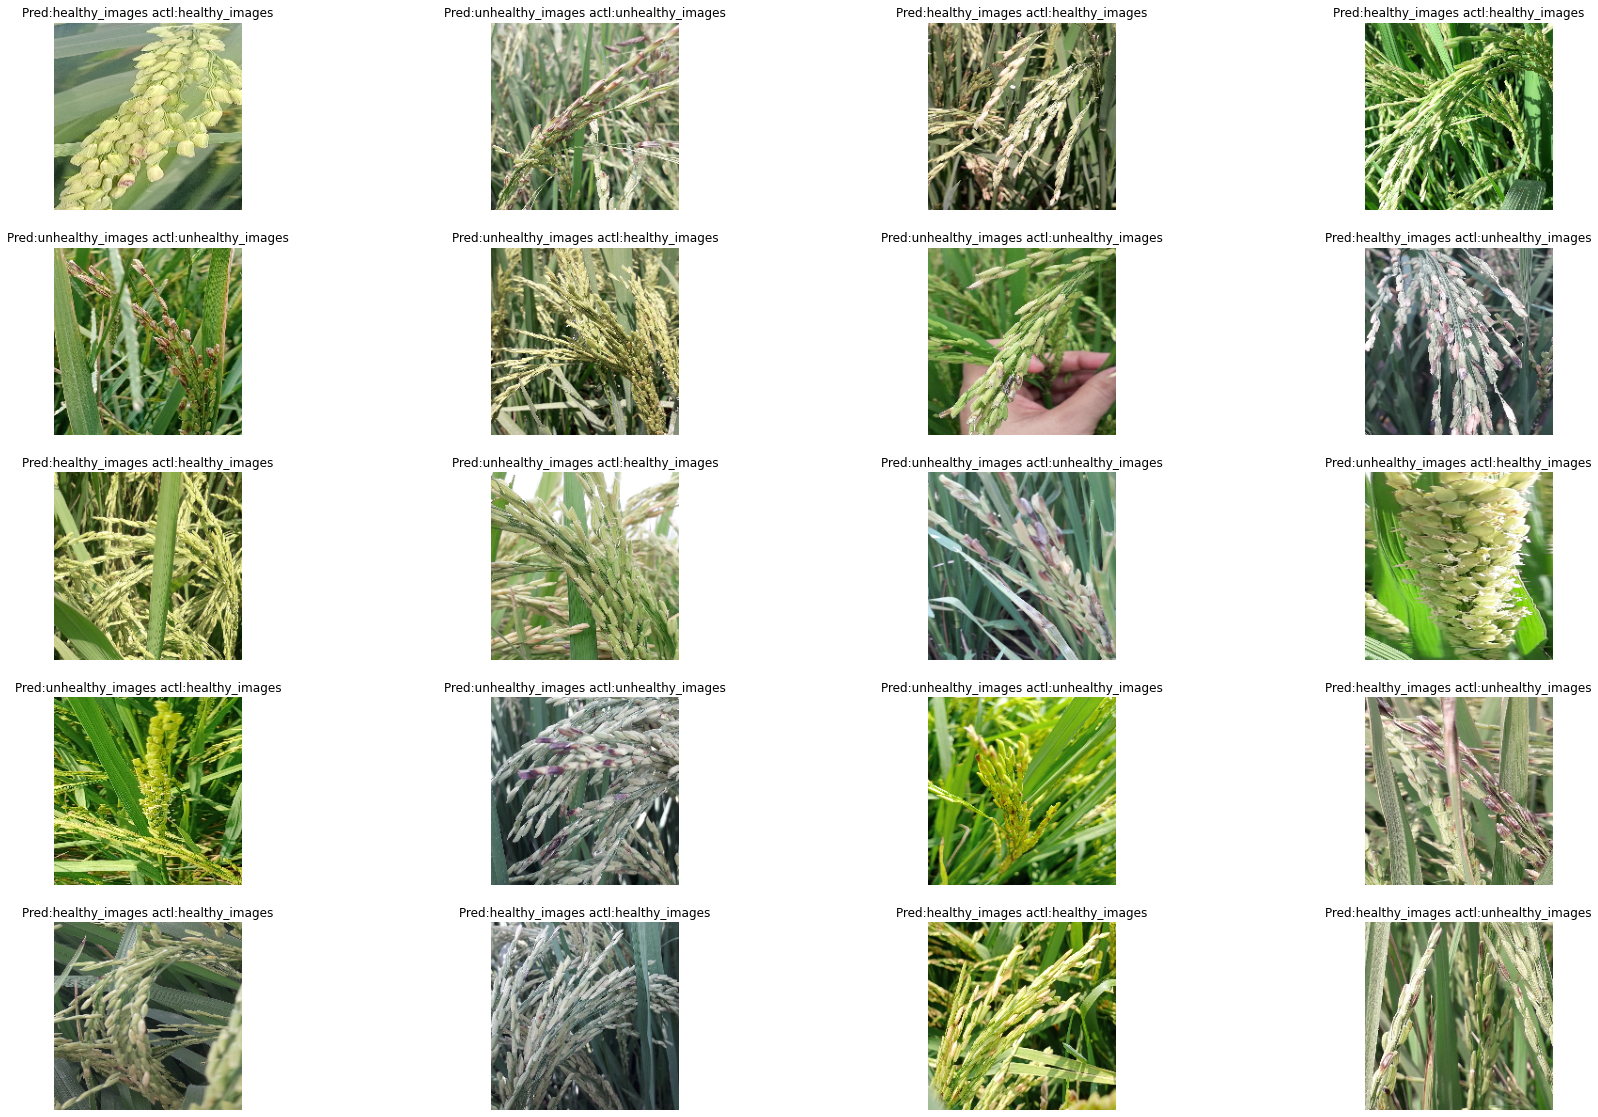

In [10]:
AccuracyVector=[]
plt.figure(figsize=(30,20))
for images,labels in testing_ds.take(1):
	predictions = MyCnn.predict(images)
	predlabel=[]
	prdlbl=[]

	for mem in predictions:
		predlabel.append(class_names[int(round(mem[0]))])
		prdlbl.append(np.argmax(mem))
	
	AccuracyVector=np.array(prdlbl)==labels

	for i in range(20):
		ax=plt.subplot(5,4,i+1)
		plt.imshow(images[i].numpy().astype('uint8'))
		plt.title('Pred:'+predlabel[i]+' actl:'+class_names[labels[i]])
		plt.axis('off')
		plt.grid(True)



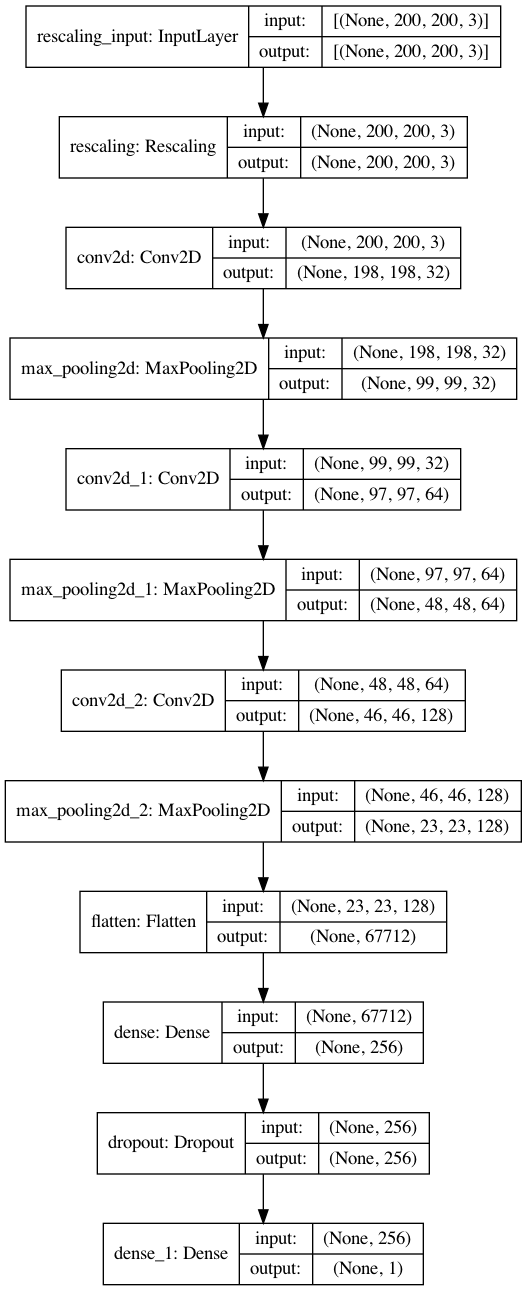

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
MyCnn.save('model1.h5')